In [27]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
import torch as t
from matplotlib import pyplot as plt
import matplotlib

In [5]:
## derivative of a function

def f(x): 
    return 3 * x**2 - 4*x

def finite_diff(func, x, h):
    return (func(x+h) - func(x))/h

x = 1
for h in 10.0**np.arange(-1,-6,-1):
    print(f"h = {h}, numerical limit = {finite_diff(f,x,h)}")

h = 0.1, numerical limit = 2.3000000000000043
h = 0.01, numerical limit = 2.0299999999999763
h = 0.001, numerical limit = 2.002999999999311
h = 0.0001, numerical limit = 2.0002999999979565
h = 1e-05, numerical limit = 2.0000300000155846


In [15]:
def use_svg_display():
    """Use the svg format to display plot in jupyter"""
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize = (3.5,2.5)):
    """Set matplotlib figsize"""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel = None, ylabel = None, xlim = None, ylim = None, xscale ='linear', yscale = 'linear', legend = False):
    """Set axes attributes for matplotlib"""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xlim(xlim), axes.set_ylim(ylim)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    if legend:
        axes.legend(legend)
    axes.grid()

In [80]:
def plot(X, Y = None, xlabel = None, ylabel = None, xlim = None, ylim = None, xscale ='linear', yscale = 'linear', legend = False,lines=('-', 'm--','g-.','r:'),figsize = (3.5,2.5), axes = None):
    _, axes = plt.subplots(figsize = figsize)
    ## X and Y should be input as a list
    for x, y, line in zip(X,Y,lines):
        axes.plot(x,y,line)
    set_axes(axes, xlabel= xlabel, ylabel= ylabel, xlim=xlim, ylim=ylim, xscale=xscale, yscale=yscale, legend=legend)


    

/var/folders/yj/gj5_5c_j1399_7h47zvzddtc0000gn/T/ipykernel_26253/2619821257.py:4: RuntimeWarning: divide by zero encountered in divide
  plot([x,x], [x**3 - 1/x,4*x - 4], xlabel = 'x', ylabel ='g(x)', legend=['g(x)', 'Tangent at x =1'])


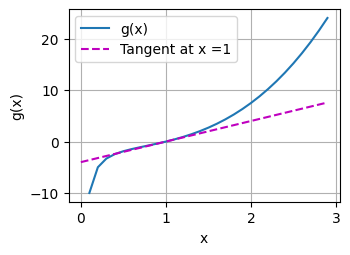

In [87]:

x = np.arange(0,3,0.1)
#plot([x,x], [f(x),2 *x -3], xlabel = 'x', ylabel ='f(x)', legend=['f(x)', 'Tangent at x =1'])

plot([x,x], [x**3 - 1/x,4*x - 4], xlabel = 'x', ylabel ='g(x)', legend=['g(x)', 'Tangent at x =1'])




In [74]:
n=8
width = [1,2,2,2,1]
cases = [[2, 3], [1, 4], [2, 4], [2, 4], [2, 3]]
mins = []
for case in cases:
    print(width[case[0]:case[1]+1])
    mins.append(min(width[case[0]:case[1]]))
    #print(mins)


[2, 2]
[2, 2, 2, 1]
[2, 2, 1]
[2, 2, 1]
[2, 2]


Automatic Differentiation in PyTorch! 
Builds a computational graph during a forward pass of how each function depends on the others 
Uses backprob and the chain rule to differentiate through the model to optimize the algorithm

In [95]:
x = t.arange(4.0, requires_grad= True) # can also do x.requires_grad_(True) as second step
x.grad # x's grad attribute. None by default 

## create a function of x
y = 2 * t.dot(x,x)
print(y)
# use backward to get the gradient of y wrt x
y.backward()
x.grad == 4 * x 

tensor(28., grad_fn=<MulBackward0>)


tensor([True, True, True, True])

In [97]:
## Gradients are added to x.grad every time a new function of x is calculated, unless we call: 
x.grad.zero_() #resets the gradient

y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [107]:
### If x is not a scalar, we can tell it the shape of the gradient 
x.grad.zero_()
y = x * x
y.backward(gradient=t.ones(len(y)))
#y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [133]:
## Use detach() if you only want to consider the direct effect of later variables on earlier ones, and not the ones in between
x = t.arange(4.0, requires_grad= True) # can also do x.requires_grad_(True) as second step

# keeping y, usual chain rule
y = x *x
z = y * x

z.sum().backward(retain_graph= True)
#x.grad == u
print(x.grad== 3 * x**2) ## d(x**3)

x.grad.zero_()
u = y.detach() #copy y and don't track it going forward
z = u * x
z.sum().backward()
print(x.grad == u)

# You can still calculate gradients of y! If we use retain_graph = True. Otherwise we can only go through it once 
x.grad.zero_()
y.sum().backward()
x.grad == 2*x

tensor([True, True, True, True])
tensor([True, True, True, True])


tensor([True, True, True, True])

In [141]:
## AD makes it easy to record derivatives even if they pass through loops, etc. 

# A linear function: 
def f(a):
    b = 2 * a
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = t.randn(size = (), requires_grad= True)
d = f(a)
d.backward()
a.grad == d / a


tensor(True)

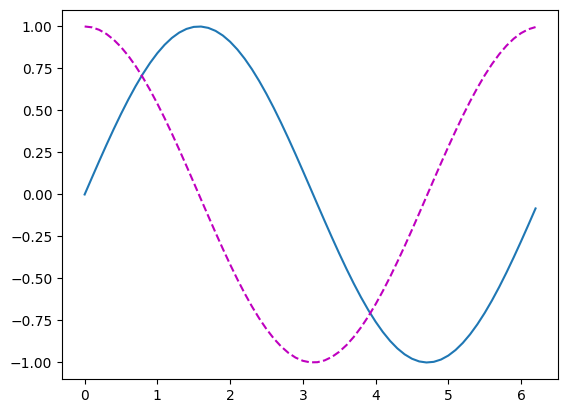

In [164]:
x = t.arange(0,2*t.pi,step=.1,requires_grad= True)
y = t.sin(x)
y.sum().backward()
x.grad == t.cos(x)

plt.plot(x.detach().numpy(), y.detach().numpy(), '-',x.detach().numpy(), x.grad.detach().numpy(), 'm--' ) #detach to get rid of grad 

